# Personal Information
Name: Iva Schenk

StudentID: 12402605

Email: [**iva.schenk@student.uva.nl**](iva.schenk@student.uva.nl)

Submitted on: 19.03.2023

Github Link: https://github.com/ivaschenk/master_thesis

# Data Context
The open source THINGS-database is used (https://things-initiative.org/). This  initative is based on a large image dataset of 1854 unique object concepts, which is used in behavioural and neuroscience research that focuses on the human understandig of objects. The data that results from these researches are added to the THINGS initiative platform to collaboratively create an extensive database on object understandig. 

For this thesis, the odd-one-out similarity judgement of the THINGS-databse is used. This is created by giving participants (N=12,340) the triplet odd-one-out task, where they had to choose which two objects were most similair in the context of a third object based on an image of the objects. This resulted in 4.7 million similarity judgements over 1854 object concepts.

# Data Description

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
# import networkx as nx

### Data Loading
1. Triplet judgement trainset: e.g. (3,76,40) --> image 40 is judged as the odd-one-out

In [3]:
# load data in numpy array of shape N,3 (N= number of triplets)
train = np.load("../SPoSE/data/train_90.npy")
train.shape

(4120663, 3)

In [4]:
test = np.load("../SPoSE/data/test_10.npy")
test.shape

(457430, 3)

In [5]:
len(train) + len(test)

4578093

In [18]:
with open('../SPoSE/data/testset1.txt') as f:
    lines = f.readlines()
    test1 = np.asarray([list(map(int, l.split())) for l in lines])
    
with open('../SPoSE/data/testset2.txt') as f:
    lines = f.readlines()
    test2 = np.asarray([list(map(int, l.split())) for l in lines])
    
with open('../SPoSE/data/testset3.txt') as f:
    lines = f.readlines()
    test3 = np.asarray([list(map(int, l.split())) for l in lines])

In [19]:
len(test1), len(test2), len(test3)

(15640, 36407, 36401)

In [26]:
len(train) + len(test) + len(test1) + len(test2) + len(test3)

4666541

In [33]:
# REMOVE
train = np.unique(np.concatenate([train, test, test1, test2, test3]), axis=0)

2. Wordnet dataset:
- objectID = ID of object as used in the trainset
- Word = english word for object
- Wordnet Synset = synonyms of the word
- uniqueID = same as Word. If there is a Word with 2 object concepts, a number is added (e.g. chest1 = breast; chest2 = box),

In [34]:
wordnet = pd.read_csv("../SPoSE/data/wordnet/items1854names.tsv", sep="\t"
                      ).rename_axis('objectID').reset_index()[[
    'objectID', 'Word', 'Wordnet Synset', 'uniqueID']]
print('Length of df : ', len(wordnet))
wordnet.head(2)

Length of df :  1854


,objectID,Word,Wordnet Synset,uniqueID
0,0,aardvark,"aardvark, ant_bear, anteater, Orycteropus_afer",aardvark
1,1,abacus,abacus,abacus


3. Category dataset: all object concepts are part of one ore multiple categories

In [35]:
category_df = pd.read_csv("../SPoSE/data/wordnet/category53_longFormat.tsv", sep="\t")
print('Number of categories : ',len(category_df['category'].unique()))
category_df.head(2)

Number of categories :  53


,category,uniqueID,Word
0,animal,aardvark,aardvark
1,animal,alligator,alligator


### Analysis 1: analyse the number of times an object/ pair of objects occures in the trainset
1. All single objects
- Conclusion: there is a normal distribution and there is not much difference in amount of occurences between the objects that appear least and most. 

Number of unique objects: 1854


Text(0.5, 1.0, 'Histogram of the amount of times objects occure in the dataset')

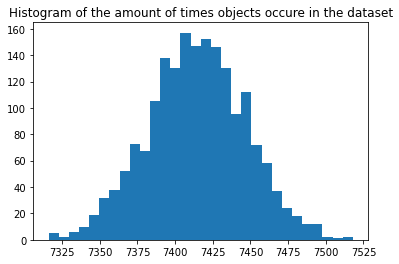

In [37]:
# objects + amount of times it occures in the trainset
unique, counts = np.unique(train, return_counts=True)
print('Number of unique objects:', unique.shape[0])

plt.hist(counts, bins=30)
plt.title("Histogram of the amount of times objects occure in the dataset")


In [39]:
np.mean(counts), np.std(counts)

(7414.241100323625, 32.248924186628265)

2. odd-one-out objects
- Conclusion: data is right-skewed; a few objects occure way more often as odd-one-out


Text(0.5, 1.0, 'Histogram of the amount of times an object is the odd-one-out')

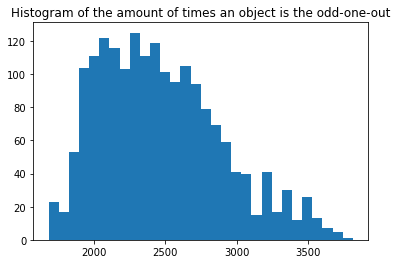

In [51]:
# distribution of the amount of times an object is the "odd-one-out"
unique_ooo, counts_ooo = np.unique(train[:, 2], return_counts=True)
plt.hist(counts_ooo, bins=30)
plt.title("Histogram of the amount of times an object is the odd-one-out")

3. Similair pairs (two objects not choosen as odd-one-out)
- Conclusion: almost exponentially declining

Text(0.5, 1.0, 'Histogram of the amount of times two objects are most similair')

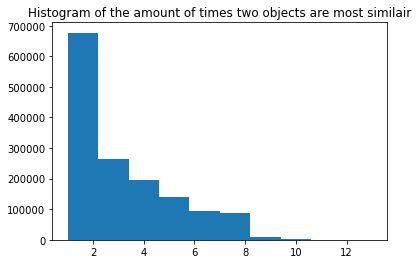

In [41]:
# distribution of the amount of times two objects are most similair
train_sim = np.sort(train[:, :2], axis=1)
unique_sim, counts_sim = np.unique(train_sim, axis=0, return_counts=True)
plt.hist(counts_sim)
plt.title("Histogram of the amount of times two objects are most similair")

4. all pairs

Text(0.5, 1.0, 'Histogram of the amount of times two objects apear togheter in a triplet')

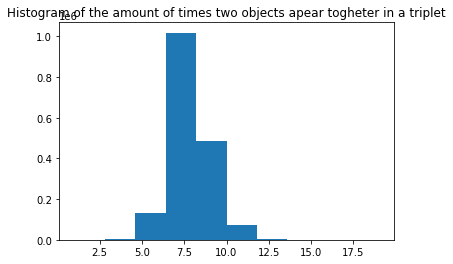

In [42]:
# extract all pairs from triples -> order pairs to ensure (1,2) is same as (2,1)
train_pairs1 = np.sort(train[:, :2], axis=1)
train_pairs2 = np.sort(train[:, 1:], axis=1)
train_pairs3 = np.sort(train[:, ::2], axis=1)
pairs = np.concatenate([train_pairs1, train_pairs2, train_pairs3])
unique_pairs, counts_pairs = np.unique(pairs, axis=0, return_counts=True)

plt.hist(counts_pairs)
plt.title("Histogram of the amount of times two objects apear togheter in a triplet")

### Analysis 2: similairity judgement in comparison to total judgement of pairs of objects
1. Percentage of time two objects are rated most similair in proportion to total times the two objects where presented togheter in a triplet

In [61]:
np.unique(train.flatten(), return_counts=True)

(array([   0,    1,    2, ..., 1851, 1852, 1853]),
 array([7370, 7395, 7316, ..., 7393, 7365, 7443]))

Text(0.5, 1.0, 'Histogram of percentage of time object is judged as odd-one-out')

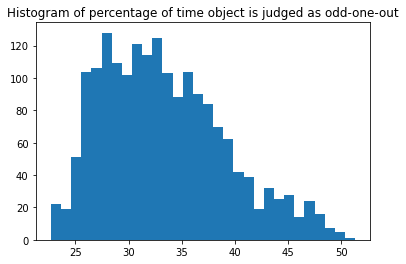

In [64]:
ooo_dict = dict(zip(unique_ooo, counts_ooo))
unique_all, counts_all = np.unique(train.flatten(), return_counts=True)
all_dict = dict(zip(unique_all, counts_all))

ooo_perc_dict = {key: ooo_dict[key] / all_dict[key] * 100 for key in all_dict.keys()}
plt.hist(list(ooo_perc_dict.values()), bins=30)
plt.title("Histogram of percentage of time object is judged as odd-one-out")

In [83]:
# np.mean(ooo_perc_dict.values), np.std(ooo_perc_dict), np.min(ooo_perc_dict), np.max(ooo_perc_dict)
np.mean(np.asarray(list(ooo_perc_dict.values()))), np.std(np.asarray(list(ooo_perc_dict.values()))), np.min(np.asarray(list(ooo_perc_dict.values()))), np.max(np.asarray(list(ooo_perc_dict.values())))

(33.33421631879242, 5.782148129592399, 22.681940700808624, 51.291016675632065)

Text(0.5, 1.0, 'Histogram of percentage of time pair is judged similair')

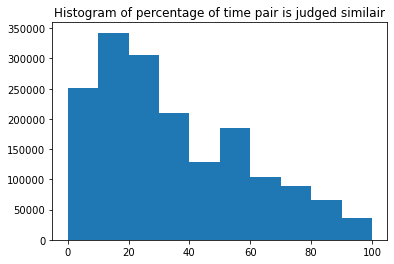

In [92]:
# first zip the two objects to form key, second zip keys with values (counts)
keys_pairs = list(zip(unique_pairs[:, 0], unique_pairs[:, 1])) # keys of object pairs
pairs_dict = dict(zip(keys_pairs, counts_pairs))

# first zip the two objects to from key, second zip keys with values (counts)
keys_sim = list(zip(unique_sim[:, 0], unique_sim[:, 1])) # keys of object pairs
sim_dict = dict(zip(keys_sim, counts_sim))

sim_perc_dict = {key: sim_dict[key] / pairs_dict[key] * 100 if key in sim_dict.keys() else 0
                 for key in pairs_dict.keys() }
plt.hist(list(sim_perc_dict.values()))
plt.title("Histogram of percentage of time pair is judged similair")

In [115]:
# len(np.where(np.asarray(list(sim_perc_dict.values())) <= 1/3*100)[0])/len(sim_perc_dict)
from itertools import combinations
[k for k in list(combinations(range(1854), 2)) if k not in list(pairs_dict.keys())]

KeyboardInterrupt: 

Documents 0 and 15 are rated most similair 100% of the time they occure in a triplet. Those objects are both animals.

In [44]:
print(max(sim_perc_dict, key=sim_perc_dict.get), max(sim_perc_dict.values()))
wordnet.iloc[[0,15]]


(0, 15) 100.0


,objectID,Word,Wordnet Synset,uniqueID
0,0,aardvark,"aardvark, ant_bear, anteater, Orycteropus_afer",aardvark
15,15,alpaca,"alpaca, Lama_pacos",alpaca


### Analysis 3: categories
1. Number of object concepts per category

Top 5 categories with the least objects


category
jewelry                15
condiment              15
footwear               15
protective clothing    16
outerwear              16
Name: uniqueID, dtype: int64

Top 5 categories with the most objects


category
container    105
tool         107
clothing     108
animal       177
food         295
Name: uniqueID, dtype: int64

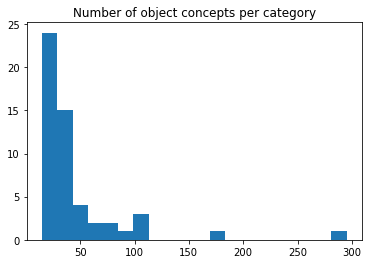

In [45]:
cat_size = category_df.groupby('category')['uniqueID'].count()
plt.hist(cat_size, bins=20)
plt.title("Number of object concepts per category")
print('Top 5 categories with the least objects') 
display(cat_size.sort_values().head())
print('Top 5 categories with the most objects') 
display(cat_size.sort_values().tail())

2. Number of cateogries per object

uniqueID
squirt_gun      1
shredder        1
hand            1
handbrake       1
handkerchief    1
               ..
scissors        5
helmet          5
tweezers        5
lab_coat        5
chainsaw        6
Name: category, Length: 1448, dtype: int64

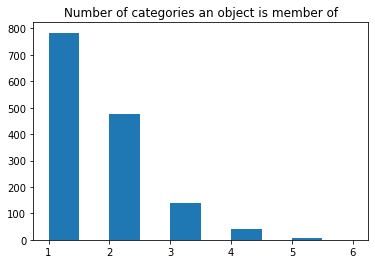

In [46]:
# connect objectID to category in order to connect to train data
object_category_df = pd.merge(wordnet[['objectID', 'uniqueID']], category_df[['category', 'uniqueID']]
                              )

cat_per_obj = object_category_df.groupby('uniqueID')['category'].count().sort_values()
plt.hist(cat_per_obj)
plt.title("Number of categories an object is member of")
cat_per_obj

3. Similarity scores for objects with same vs different categories

In [47]:
# create dataframe with the percentage of times two objects were judged similair out of total times
# they appeared toghether
sim_df = pd.DataFrame.from_dict(sim_perc_dict, orient='index', columns=['sim_judge_perc']).reset_index()
sim_df['objectID_1'], sim_df['objectID_2'] = zip(*sim_df['index'])

# add category of object 1 and 2
sim_df = pd.merge(sim_df, object_category_df[['objectID', 'category']], left_on='objectID_1', 
                  right_on='objectID').rename({'category': 'category_object1'}, axis=1
                                              ).drop(['objectID'], axis=1)
sim_df = pd.merge(sim_df, object_category_df[['objectID', 'category']], left_on='objectID_2', 
                  right_on='objectID').rename({'category': 'category_object2'}, axis=1
                                              ).drop(['objectID'], axis=1)

# mean similarity rating of objects with same category
sim_df_same = sim_df[sim_df['category_object1'] == sim_df['category_object2']]
print('Similarity judgement percentage for object with same category: ',
       sim_df_same['sim_judge_perc'].mean())

# mean similarity rating of objects with different category (all categories have to be different)
sim_df_diff = sim_df[~sim_df['index'].isin(sim_df_same['index'])].drop_duplicates('index', keep='first')
print('Similarity judgement percentage for object with different category: ',
      sim_df_diff['sim_judge_perc'].mean())

Similarity judgement percentage for object with same category:  74.88858180517238
Similarity judgement percentage for object with different category:  35.3574172985892


In [48]:
sim_df_same_head = sim_df_same.groupby(['category_object1', 'category_object2'])[['sim_judge_perc']
                                                              ].mean().sort_values(by='sim_judge_perc').head()

sim_df_same_tail = sim_df_same.groupby(['category_object1', 'category_object2'])[['sim_judge_perc']
                                                              ].mean().sort_values(by='sim_judge_perc').tail()
print('Objects with the same category (head)'), display(sim_df_same_head)
print('Objects with the same category (tail)'), display(sim_df_same_tail)

Objects with the same category (head)


,,sim_judge_perc
category_object1,category_object2,
container,container,52.735255
home decor,home decor,53.099699
scientific equipment,scientific equipment,58.714635
arts and crafts supply,arts and crafts supply,59.139300
toy,toy,59.354328


Objects with the same category (tail)


,,sim_judge_perc
category_object1,category_object2,
mammal,mammal,93.106641
farm animal,farm animal,93.297235
drink,drink,93.431960
bird,bird,95.209482
insect,insect,95.449320


(None, None)

In [49]:
print('Objects with different categories')
sim_df_diff.groupby(['category_object1', 'category_object2'])[['sim_judge_perc']
                                                              ].mean().sort_values(by='sim_judge_perc')

Objects with different categories


sim_judge_perc
category_object1 category_object2                     
watercraft       breakfast food              11.111111
                 dessert                     11.111111
condiment        watercraft                  13.095238
watercraft       game                        13.392857
                 personal hygiene item       14.285714
...                                                ...
dessert          candy                       80.714286
                 drink                       81.486216
drink            dessert                     83.240264
dessert          condiment                   83.482143
breakfast food   dessert                     84.479718

[1773 rows x 1 columns]

3. Categories and sub-categories

Text(0.5, 1.0, 'Number of times two categories are linked to the same object')

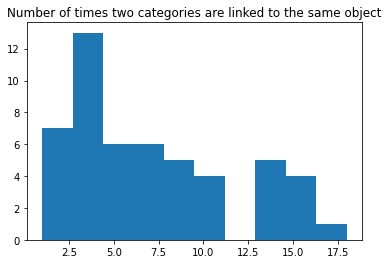

In [50]:
# check if some combinations always apear togheter (subcategories)
# 1. get al pairs of categories that appear as the same category of an object
categories_df = object_category_df.groupby('uniqueID')['category'].apply(lambda x: list(combinations(x,2))
                                                                         ).reset_index()


# 2. remove all entries where an object is only 1 category and put all values in list of tuples
categorie_pairs = sum(categories_df[categories_df['category'].apply(len) != 0]['category'].to_list(), [])

# 3. count categorie pairs
categorie_pairs_dict = dict(sorted(Counter(categorie_pairs).items()))

# # 4. change to (objec0, object1, count) to add to graph
# weighted_edges = [(k[0], k[1], v) for k,v in categorie_pairs_dict.items()]
# G = nx.Graph()
# G.add_weighted_edges_from(weighted_edges)
plt.hist(Counter(sum(categorie_pairs_dict.keys(), ())).values())
plt.title('Number of times two categories are linked to the same object')

# Hyperbolic space

In [12]:
# %pip install git+https://github.com/geoopt/geoopt.git
import geoopt
from geoopt.manifolds.lorentz import Lorentz
from geoopt.manifolds.lorentz import math
import torch

In [10]:
k = 3 # choose curvature parameter
dim = 2
man = Lorentz(k=k)

In [14]:
x_h = man.projx(x) # project onto the hyperboloid

In [15]:
x

tensor([[-0.7091, -1.9634],
        [ 0.4551, -0.6664],
        [-0.1113, -0.1021],
        [ 0.9678, -0.3480],
        [ 0.4079,  0.2220],
        [-1.6047, -0.8559],
        [ 1.3693,  1.9991],
        [ 1.3484,  1.2415],
        [-1.8538,  0.2046],
        [ 0.5556,  0.2916],
        [-0.6755,  0.8140],
        [-0.4587,  0.8209],
        [ 0.4460, -0.3691],
        [-1.4326,  0.7580],
        [-0.6638, -0.0173],
        [ 1.6530,  0.3309],
        [ 0.1492,  0.6725],
        [-0.0584,  1.4729],
        [-0.3419, -0.3003],
        [-0.1567,  1.0056]])

In [16]:
x_h

tensor([[ 2.6182, -1.9634],
        [ 1.8558, -0.6664],
        [ 1.7351, -0.1021],
        [ 1.7667, -0.3480],
        [ 1.7462,  0.2220],
        [ 1.9320, -0.8559],
        [ 2.6451,  1.9991],
        [ 2.1310,  1.2415],
        [ 1.7441,  0.2046],
        [ 1.7564,  0.2916],
        [ 1.9138,  0.8140],
        [ 1.9167,  0.8209],
        [ 1.7709, -0.3691],
        [ 1.8906,  0.7580],
        [ 1.7321, -0.0173],
        [ 1.7634,  0.3309],
        [ 1.8580,  0.6725],
        [ 2.2737,  1.4729],
        [ 1.7579, -0.3003],
        [ 2.0028,  1.0056]])

In [22]:
man._check_point_on_manifold(x[15])

(False, "'x' minkowski quadratic form is not equal to -3.0")

In [19]:
x[0]

tensor([-0.7091, -1.9634])

In [23]:
x_h[0]

tensor([ 2.6182, -1.9634])

In [27]:
man._check_point_on_manifold(torch.tensor([2.6182, -1.9634]))

(True, None)